### **Based on word occurence and frequency**

In [1]:
import numpy as np
import pandas as pd
import os
import json

##### **Load data dictionary and test data**

In [2]:
with open("lang_dict.json","r") as f:
    lang_dict = json.load(f)

In [3]:
lang_dict["en"]["the"]

5324

In [4]:
test_data, test_labels = [], []
with open("/workspace/lang-detect/europarl.test", "r") as f:
    for line in f:
        line = line.split()
        test_data.append(" ".join(line[1:]))
        test_labels.append(line[0])
print(test_data[0], test_labels[0])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
print(len(test_data))

21000


In [6]:
test_data[:2]

['"\xd0\x95\xd0\xb2\xd1\x80\xd0\xbe\xd0\xbf\xd0\xb0 2020" \xd0\xbd\xd0\xb5 \xd1\x82\xd1\x80\xd1\x8f\xd0\xb1\xd0\xb2\xd0\xb0 \xd0\xb4\xd0\xb0 \xd1\x81\xd1\x82\xd0\xb0\xd1\x80\xd1\x82\xd0\xb8\xd1\x80\xd0\xb0 \xd0\xbd\xd0\xbe\xd0\xb2 \xd0\xba\xd0\xbe\xd0\xbd\xd0\xba\xd1\x83\xd1\x80\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb5\xd0\xbd \xd0\xbc\xd0\xb0\xd1\x80\xd0\xb0\xd1\x82\xd0\xbe\xd0\xbd \xd0\xb8 \xd0\xb8\xd0\xb7\xd1\x85\xd0\xbe\xd0\xb4 \xd1\x81 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb2\xd0\xb0\xd1\x82\xd0\xb8\xd0\xb7\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8f.',
 '(CS) \xd0\x9d\xd0\xb0\xd0\xb9-\xd0\xb3\xd0\xbe\xd0\xbb\xd1\x8f\xd0\xbc\xd0\xb0\xd1\x82\xd0\xb0 \xd0\xbd\xd0\xb5\xd1\x81\xd0\xbf\xd1\x80\xd0\xb0\xd0\xb2\xd0\xb5\xd0\xb4\xd0\xbb\xd0\xb8\xd0\xb2\xd0\xbe\xd1\x81\xd1\x82 \xd0\xbd\xd0\xb0 \xd1\x81\xd0\xb5\xd0\xb3\xd0\xb0\xd1\x88\xd0\xbd\xd0\xb0\xd1\x82\xd0\xb0 \xd0\xbe\xd0\xb1\xd1\x89\xd0\xb0 \xd1\x81\xd0\xb5\xd0\xbb\xd1\x81\xd0\xba\xd0\xbe\xd1\x81\xd1\x82\xd0\xbe\xd0\xbf\xd0\xb0\xd0\xbd\xd1\x81\xd0\xba\xd0\xb0 \x

##### **Preprocess the data**

In [21]:
import utils

In [8]:
for i in range(len(test_data)):
    test_data[i] = utils.preprocess(test_data[i])

In [9]:
test_data[:2]

['\xd0\x95\xd0\xb2\xd1\x80\xd0\xbe\xd0\xbf\xd0\xb0 \xd0\xbd\xd0\xb5 \xd1\x82\xd1\x80\xd1\x8f\xd0\xb1\xd0\xb2\xd0\xb0 \xd0\xb4\xd0\xb0 \xd1\x81\xd1\x82\xd0\xb0\xd1\x80\xd1\x82\xd0\xb8\xd1\x80\xd0\xb0 \xd0\xbd\xd0\xbe\xd0\xb2 \xd0\xba\xd0\xbe\xd0\xbd\xd0\xba\xd1\x83\xd1\x80\xd0\xb5\xd0\xbd\xd1\x82\xd0\xb5\xd0\xbd \xd0\xbc\xd0\xb0\xd1\x80\xd0\xb0\xd1\x82\xd0\xbe\xd0\xbd \xd0\xb8 \xd0\xb8\xd0\xb7\xd1\x85\xd0\xbe\xd0\xb4 \xd1\x81 \xd0\xbf\xd1\x80\xd0\xb8\xd0\xb2\xd0\xb0\xd1\x82\xd0\xb8\xd0\xb7\xd0\xb0\xd1\x86\xd0\xb8\xd1\x8f ',
 'CS \xd0\x9d\xd0\xb0\xd0\xb9-\xd0\xb3\xd0\xbe\xd0\xbb\xd1\x8f\xd0\xbc\xd0\xb0\xd1\x82\xd0\xb0 \xd0\xbd\xd0\xb5\xd1\x81\xd0\xbf\xd1\x80\xd0\xb0\xd0\xb2\xd0\xb5\xd0\xb4\xd0\xbb\xd0\xb8\xd0\xb2\xd0\xbe\xd1\x81\xd1\x82 \xd0\xbd\xd0\xb0 \xd1\x81\xd0\xb5\xd0\xb3\xd0\xb0\xd1\x88\xd0\xbd\xd0\xb0\xd1\x82\xd0\xb0 \xd0\xbe\xd0\xb1\xd1\x89\xd0\xb0 \xd1\x81\xd0\xb5\xd0\xbb\xd1\x81\xd0\xba\xd0\xbe\xd1\x81\xd1\x82\xd0\xbe\xd0\xbf\xd0\xb0\xd0\xbd\xd1\x81\xd0\xba\xd0\xb0 \xd0\xbf\xd

#### **Test**

In [10]:
# Based on total occurence
output_labels = []
for i in range(len(test_data)):
    count = {}
    for key in lang_dict.keys():
        count[key] = 0
    for token in test_data[i].split():
        for key in lang_dict.keys():
            if token in lang_dict[key]:
                count[key] += lang_dict[key][token]
    best_lang, max_count = "NN", 0
    for key in count.keys():
        if count[key] > max_count:
            best_lang = key
            max_count = count[key]
    output_labels.append(best_lang)

In [11]:
print(len(output_labels), len(test_labels))

(21000, 21000)


In [12]:
correct_preds = 0
for i in range(len(output_labels)):
    if output_labels[i] == test_labels[i]:
        correct_preds += 1
print("Accuracy", float(correct_preds)/len(output_labels)*100)

('Accuracy', 56.08571428571428)


In [13]:
# Based on 0-1 occurence
output_labels = []
for i in range(len(test_data)):
    count = {}
    for key in lang_dict.keys():
        count[key] = 0
    for token in test_data[i].split():
        for key in lang_dict.keys():
            if token in lang_dict[key]:
                count[key] += 1
    best_lang, max_count = "NN", 0
    for key in count.keys():
        if count[key] > max_count:
            best_lang = key
            max_count = count[key]
    output_labels.append(best_lang)

In [14]:
correct_preds = 0
for i in range(len(output_labels)):
    if output_labels[i] == test_labels[i]:
        correct_preds += 1
print("Accuracy", float(correct_preds)/len(output_labels)*100)

('Accuracy', 85.26666666666667)


#### **Accuracy based on 0-1 occurence is 85% which is remarkable while if we include total frequency of each token, then the accuracy reduces to 56%.**

In [15]:
# Test few cases where this model didn't work
num_case = 0
for i in range(len(output_labels)):
    if output_labels[i] != test_labels[i]:
        print(test_data[i])
        print("Actual Language {0} | Predicted Language {1}".format(test_labels[i], output_labels[i]))
        count = {}
        for key in lang_dict.keys():
            count[key] = 0
        for token in test_data[i].split():
            for key in lang_dict.keys():
                if token in lang_dict[key]:
                    count[key] += 1
        print(count)
        print("--------------------------------")
        num_case += 1
        if num_case == 10:
            break

Европа не трябва да стартира нов конкурентен маратон и изход с приватизация 
Actual Language bg | Predicted Language NN
{u'pl': 0, u'el': 0, u'fr': 0, u'bg': 0, u'nl': 0, u'ro': 0, u'pt': 0, u'de': 0, u'sv': 0, u'da': 0, u'lv': 0, u'cs': 0, u'lt': 0, u'en': 0, u'sk': 0, u'sl': 0, u'it': 0, u'et': 0, u'hu': 0, u'fi': 0, u'es': 0}
--------------------------------
CS Най-голямата несправедливост на сегашната обща селскостопанска политика е фактът че субсидиите се разпределят неравностойно и несправедливо между старите и новите държави-членки 
Actual Language bg | Predicted Language el
{u'pl': 0, u'el': 1, u'fr': 0, u'bg': 0, u'nl': 0, u'ro': 0, u'pt': 0, u'de': 0, u'sv': 0, u'da': 0, u'lv': 0, u'cs': 0, u'lt': 0, u'en': 0, u'sk': 0, u'sl': 0, u'it': 0, u'et': 0, u'hu': 0, u'fi': 0, u'es': 0}
--------------------------------
DE Г-жо председател г-н член на Комисията по принцип съм против въвеждането на нови данъци 
Actual Language bg | Predicted Language nl
{u'pl': 0, u'el': 0, u'fr': 0, u

#### **The words occurence is zero. That means these words has not occurred in our training data for that specific language.**

In [16]:
# Lets check which language has most wrong predictions
wrong_pred = {}
for key in lang_dict.keys():
    wrong_pred[key] = 0
for i in range(len(output_labels)):
    if output_labels[i] != test_labels[i]:
        wrong_pred[test_labels[i]] += 1
print(wrong_pred)

{u'pl': 12, u'el': 991, u'fr': 9, u'bg': 1000, u'nl': 4, u'ro': 29, u'pt': 20, u'de': 15, u'sv': 33, u'da': 32, u'lv': 72, u'cs': 127, u'lt': 87, u'en': 11, u'sk': 268, u'sl': 38, u'it': 18, u'et': 64, u'hu': 106, u'fi': 133, u'es': 25}


In [17]:
total_errors = sum(wrong_pred.values())
bg_el_errors = wrong_pred['bg'] + wrong_pred['el']
print("Total errors", total_errors)
print("bg and el errors", bg_el_errors)
print("Share of bg and el erros", bg_el_errors/float(total_errors)*100)

('Total errors', 3094)
('bg and el errors', 1991)
('Share of bg and el erros', 64.35035552682612)


#### **Bulgarian(bg) and Greek(el) has most number of mismatches.**

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

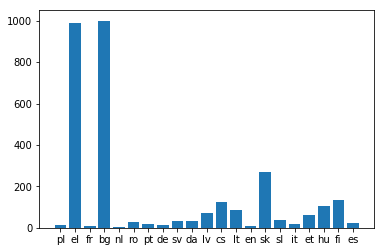

In [20]:
plt.bar(wrong_pred.keys(), wrong_pred.values())
plt.show()